Simple GA to find the value max value of a simple math function

In [14]:
import random

# Define problem-specific parameters
POP_SIZE = 10      # Population size
GENES = 5          # Number of bits in chromosome (sufficient for 0 to 31)
MUTATION_RATE = 0.1  # Probability of mutation
GENERATIONS = 20   # Number of generations

# Fitness function
def fitness(x):
    return x ** 2

# Initialize population with random chromosomes
def init_population():
    return [random.randint(0, (1 << GENES) - 1) for _ in range(POP_SIZE)]

# Decode chromosome to integer
def decode_chromosome(chromosome):
    return chromosome

# Calculate population fitness
def evaluate_population(population):
    return [fitness(decode_chromosome(ind)) for ind in population]

# Selection: Choose top 50% of population based on fitness
def selection(population, fitness_scores):
    sorted_population = [ind for _, ind in sorted(zip(fitness_scores, population), reverse=True)]
    return sorted_population[:POP_SIZE // 2]

# Crossover: Single-point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, GENES - 1)
    mask = (1 << crossover_point) - 1
    child1 = (parent1 & mask) | (parent2 & ~mask)
    child2 = (parent2 & mask) | (parent1 & ~mask)
    return child1, child2

# Mutation: Random bit flip
def mutate(chromosome):
    for i in range(GENES):
        if random.random() < MUTATION_RATE:
            chromosome ^= (1 << i)
    return chromosome

# Run GA
population = init_population()
for generation in range(GENERATIONS):
    fitness_scores = evaluate_population(population)
    selected = selection(population, fitness_scores)
    
    # Create next generation through crossover and mutation
    next_generation = []
    while len(next_generation) < POP_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child1, child2 = crossover(parent1, parent2)
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    
    population = next_generation[:POP_SIZE]

    # Print the best individual in the current generation
    best_individual = max(population, key=lambda ind: fitness(decode_chromosome(ind)))
    print(f"Generation {generation + 1}: Best Individual = {decode_chromosome(best_individual)}, Fitness = {fitness(decode_chromosome(best_individual))}")


Generation 1: Best Individual = 28, Fitness = 784
Generation 2: Best Individual = 29, Fitness = 841
Generation 3: Best Individual = 29, Fitness = 841
Generation 4: Best Individual = 29, Fitness = 841
Generation 5: Best Individual = 31, Fitness = 961
Generation 6: Best Individual = 31, Fitness = 961
Generation 7: Best Individual = 30, Fitness = 900
Generation 8: Best Individual = 30, Fitness = 900
Generation 9: Best Individual = 31, Fitness = 961
Generation 10: Best Individual = 31, Fitness = 961
Generation 11: Best Individual = 31, Fitness = 961
Generation 12: Best Individual = 31, Fitness = 961
Generation 13: Best Individual = 31, Fitness = 961
Generation 14: Best Individual = 31, Fitness = 961
Generation 15: Best Individual = 31, Fitness = 961
Generation 16: Best Individual = 31, Fitness = 961
Generation 17: Best Individual = 31, Fitness = 961
Generation 18: Best Individual = 31, Fitness = 961
Generation 19: Best Individual = 31, Fitness = 961
Generation 20: Best Individual = 31, Fit

# AI Lab: Traveling Salesman Problem with Genetic Algorithms

The Traveling Salesman Problem (TSP) is a well-known optimization problem that requires finding the shortest possible route for a salesman to visit each city once and return to the starting city. In this lab, you will use Genetic Algorithms (GAs) to solve a TSP instance and explore how evolutionary processes can approximate optimal or near-optimal solutions.

## Task:

1. Implement a Genetic Algorithm to solve the TSP. Your algorithm should include:
   - A population of routes (chromosomes) representing different city visit orders.
   - Fitness evaluation based on the total distance of each route.
   - Genetic operations such as selection, crossover, and mutation.
2. Test the algorithm on a TSP instance with at least 10 cities, with distances between cities represented in a distance matrix.
3. Experiment with different GA parameters, including population size, mutation rate, and crossover probability, and observe the effects on convergence and solution quality.

## Objectives:

- Implement a GA to find a near-optimal solution for the TSP.
- Analyze the impact of varying GA parameters.
- Compare the GA-derived solution with a brute-force or known optimal solution (if feasible) for evaluation.

## Expected Output:

1. The final route with the shortest distance found by the Genetic Algorithm.
2. A plot showing the evolution of the shortest route distance over generations.
3. A summary of findings based on parameter changes and solution quality.


[[78, 90, 22, 41, 9, 82, 88, 47, 45, 34, 7, 62, 36, 50, 75, 21, 85, 38, 32, 0, 55, 44, 17, 24, 42, 65, 71, 15, 16, 2, 18, 48, 12, 51, 54, 31, 35, 3, 98, 89, 14, 40, 25, 10, 57, 70, 99, 86, 26, 87, 72, 93, 27, 37, 8, 46, 49, 6, 96, 11, 95, 28, 56, 60, 68, 23, 73, 67, 63, 69, 29, 39, 64, 53, 80, 81, 58, 59, 1, 43, 19, 91, 74, 66, 13, 61, 94, 76, 84, 52, 33, 5, 79, 92, 4, 30, 83, 20, 97, 77], [6, 8, 70, 59, 34, 67, 75, 80, 92, 26, 91, 82, 76, 84, 25, 99, 36, 21, 54, 53, 38, 43, 94, 31, 96, 18, 28, 41, 95, 71, 72, 0, 46, 16, 79, 60, 24, 85, 20, 42, 51, 23, 14, 1, 22, 5, 9, 49, 45, 27, 97, 58, 64, 88, 81, 90, 17, 56, 55, 87, 77, 69, 35, 98, 68, 44, 86, 89, 63, 61, 39, 47, 19, 62, 74, 73, 78, 65, 10, 48, 57, 40, 7, 29, 52, 12, 3, 4, 83, 30, 33, 15, 32, 66, 13, 93, 11, 37, 2, 50], [11, 63, 99, 9, 22, 21, 37, 31, 98, 76, 8, 71, 32, 55, 97, 20, 52, 17, 2, 87, 49, 6, 50, 3, 0, 24, 29, 39, 26, 28, 66, 13, 70, 75, 86, 45, 59, 60, 36, 56, 44, 83, 42, 47, 80, 10, 41, 62, 5, 84, 74, 85, 93, 92, 40, 6

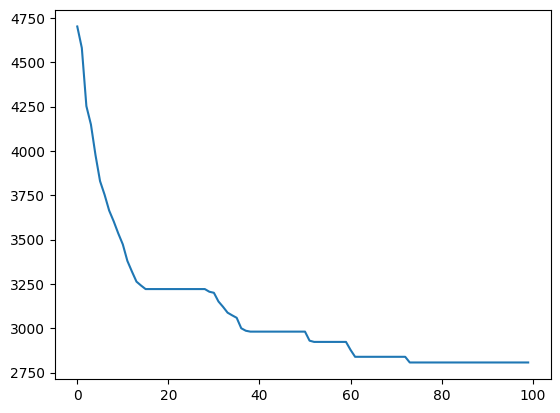

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

### The number of cities and the distance between the cities has been set for you

# Define the distance matrix for cities (example 10 cities)
num_cities = 100
distance_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))
np.fill_diagonal(distance_matrix, 0)  # Distance to self is 0

# Basic Parameters. You can change them however you like 
population_size = 100
mutation_rate = 0.01
num_generations = 100
tournament_size = 50

# Initialize population with random permutations of cities
def create_initial_population(population_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(population_size)]

# Fitness function (total distance of a route)
def fitness(route):
    # fitness = sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    fitness = distance_matrix[route[-1], route[0]] + sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    # print(fitness)
    return fitness

# Selection using tournament selection
def tournament_selection(population, scores, tournament_size):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(enumerate(scores)), tournament_size)
        # print(tournament)
        selected.append(min(tournament, key=lambda x: x[1])[0])
    return selected

# Crossover (Ordered Crossover)
def crossover(parent1, parent2):
    child = [-1] * len(parent1)
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child[start:end] = parent1[start:end]
    idx = end % len(parent2)
    for i in range(end, end + len(parent2)):
        if parent2[i % len(parent2)] not in child:
            child[idx] = parent2[i % len(parent2)]
            idx = (idx + 1) % len(parent2)
    
    return child

# Mutation (Swap Mutation)
def mutate(route, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    return route

# Genetic Algorithm function
def genetic_algorithm(num_cities, population_size, num_generations, mutation_rate, tournament_size):
    population = create_initial_population(population_size, num_cities)
    print(population)
    best_route = None
    best_distances = []
    best_distance = float('inf')

    for generation in range(num_generations):
        scores = [fitness(route) for route in population]
        # print(scores)
        selected = tournament_selection(population, scores, tournament_size)
        
        best_route = population[np.argmin(scores)]
        best_distance = min(scores)
        best_distances.append(best_distance)

        print("Best route:", best_route)
        print("Best distance:", best_distance)
        
        next_generation = []
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(population[parent1], population[parent2])
            child = mutate(child, mutation_rate)
            next_generation.append(child)
        
        population = next_generation
    
    return best_route, best_distance, best_distances

# Run the genetic algorithm
best_route, best_distance, best_distances = genetic_algorithm(num_cities, population_size, num_generations, mutation_rate, tournament_size)

# Print results
print("Best route:", best_route)
print("Best distance:", best_distance)

print(best_distances)

# Plot the evolution of the best distance
plt.plot(best_distances)


1. **Population Size**:
   - **Effect**: larger population size means more diversity in solutions, which can help the algorithm explore more solution space and avoid getting stuck in local optima.
   - **Trade-off**: Larger sizes increase computational time. Smaller sizes may lead to premature convergence, where the algorithm finds suboptimal solutions too quickly.

2. **Mutation Rate**:
   - **Effect**: Mutation introduces random changes in individuals, helping the algorithm explore new solutions that were not in the initial population.
   - **Trade-off**: A low mutation rate might not introduce enough diversity, while a high mutation rate can make the search process too random.

3. **Number of Generations**:
   - **Effect**: More generations give the algorithm more time to evolve and improve solutions, potentially leading to better results.
   - **Trade-off**: Too many generations can cause overfitting to the problem or increase computational costs without significant improvement in results.

4. **Tournament Size**:
   - **Effect**: In tournament selection, larger tournament sizes increase selection pressure, meaning fitter individuals are more likely to be selected for reproduction.
   - **Trade-off**: Too much selection pressure (large tournament size) can reduce diversity and lead to premature convergence, while too little can make the algorithm explore inefficiently and slowly converge.
